<a href="https://colab.research.google.com/github/matosapi/granite-steam-analytics/blob/main/granite_steam_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Python Packages yang dibutuhkan untuk mengakses IBM Granite menggunakan Replicate
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.11
    Uninstalling langchain-text-splitters-0.3.11:
      Successfully uninstalled langchain-text-splitters-0.3.11
ERROR: pip's dependency resolver

In [2]:
#Import Packages untuk analisis data
import numpy as np
import pandas as pd

In [119]:
#Mengambil token API dari Colab agar bisa otomatis oleh Replicate
from langchain_community.llms import Replicate
import os
from google.colab import userdata

api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

#Mengatur model AI IBM Granite 3.3-8B
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [4]:
#Mengunduh dataset Steam dari Kaggle
import kagglehub
path = kagglehub.dataset_download("fronkongames/steam-games-dataset")
print("Path to dataset files:", path)

100%|██████████| 241M/241M [00:02<00:00, 116MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fronkongames/steam-games-dataset/versions/30


In [120]:
#Membaca dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/fronkongames/steam-games-dataset/versions/30/games.csv')

In [124]:
#Melihat beberapa baris pertama dataset
df.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [125]:
#Melihat beberapa baris pertama nama kolom
df.keys()

Index(['Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age',
       'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [126]:
#Ubah struktur kolom agar dataset benar
df.columns = ['Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']

In [127]:
#Melihat beberapa baris pertama dataset yang sudah diperbaiki
df.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [128]:
#Melihat kategori berdasarkan jumlah owner game
df['Estimated owners'].value_counts()

,count
Estimated owners,
0 - 20000,70206
0 - 0,22091
20000 - 50000,8277
50000 - 100000,4068
100000 - 200000,2664
200000 - 500000,2206
500000 - 1000000,921
1000000 - 2000000,525
2000000 - 5000000,336


In [129]:
#Melihat apa yang terjadi pada owner ‘0-0’ game
df[df['Estimated owners'] == '0 - 0'].head(10)

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
1959480,Eternal Edge+ Prologue,"May 5, 2022",0 - 0,0,0,0.00,0,0,Eternal Edge + Prologue is a casual Action Adv...,"['English', 'French', 'German', 'Spanish - Spa...",...,0,0,0,"Righteous Weasel Games,Ignatios Prouctions LLC","Sedoc LLC,GrabTheGames","Single-player,Full controller support","Action,Adventure,RPG",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1662060,Moon Farming - Prologue,"Jan 6, 2022",0 - 0,0,0,0.00,0,0,/ / Tired from the same farming games on Earth...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,SimulaM,PlayWay S.A,Single-player,"Adventure,Casual,Indie,Simulation,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1943590,溪风谷之战 Playtest,"Mar 24, 2022",0 - 0,0,0,0.00,0,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995240,Deer Journey,"Jul 21, 2022",0 - 0,0,0,5.39,0,0,Deer Journey is a third person walking simulat...,"['English', 'Spanish - Spain', 'French', 'Ital...",...,0,0,0,Pablo Picazo,Pablo Picazo,"Single-player,Full controller support","Adventure,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1966960,Burial Stone Playtest,"Apr 13, 2022",0 - 0,0,0,0.00,0,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
1755120,Ghosts of War: Battle Royale WW2 Shooting games,"Oct 26, 2021",0 - 0,0,0,0.00,0,0,Second World War shooter with Battle Royale mo...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,XDEVS LTD,XDEVS LTD,"Multi-player,PvP,Online PvP,Cross-Platform Mul...","Action,Adventure,Free to Play,Massively Multip...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2010700,Hunter Survivors,"Jul 21, 2022",0 - 0,0,0,2.39,0,0,"Hunter Survivors is a survival roguelite, wher...","['English', 'Portuguese - Brazil']",...,0,0,0,LuCapy Studio,LuCapy Studio,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie,RPG",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1688630,Emperial Knights Playtest,"Nov 14, 2021",0 - 0,0,0,0.00,0,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
2026860,Maria Blanchard Virtual Gallery,"Jul 1, 2022",0 - 0,0,0,0.00,0,0,Maria Blanchard (1881-1932). She was a Franco-...,['Spanish - Spain'],...,0,0,0,Virtual Video,Virtual Video,NaN,"Design & Illustration,Education",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1478660,Slotracers VR Playtest,"Dec 17, 2020",0 - 0,0,0,0.00,0,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#Menghapus game yang memiliki 0 owner game
df = df[df['Estimated owners'] != '0 - 0']

In [131]:
#Mengidentifikasi kategori perkiraan owner game
df['Estimated owners'].value_counts().index

Index(['0 - 20000', '20000 - 50000', '50000 - 100000', '100000 - 200000',
       '200000 - 500000', '500000 - 1000000', '1000000 - 2000000',
       '2000000 - 5000000', '5000000 - 10000000', '10000000 - 20000000',
       '20000000 - 50000000', '50000000 - 100000000', '100000000 - 200000000'],
      dtype='object', name='Estimated owners')

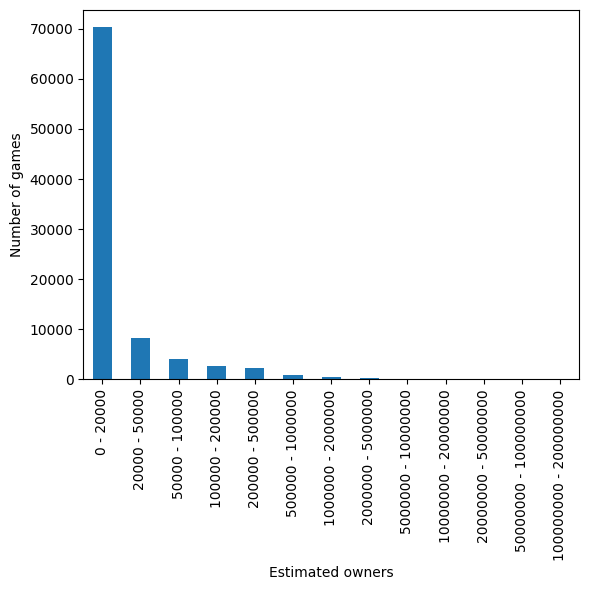

In [132]:
#Membuat grafik untuk setiap kategori perkiraan owner game
df['Estimated owners'].value_counts().reindex(estimated_owners_order).plot.bar(ylabel='Number of games');

In [133]:
#Menghitung persentase game gratis (dalam persen)
df_percent_free = df[df['Price'] == 0]['Estimated owners'].value_counts() / df['Estimated owners'].value_counts() * 100

df_wo_free = df[df['Price'] != 0]

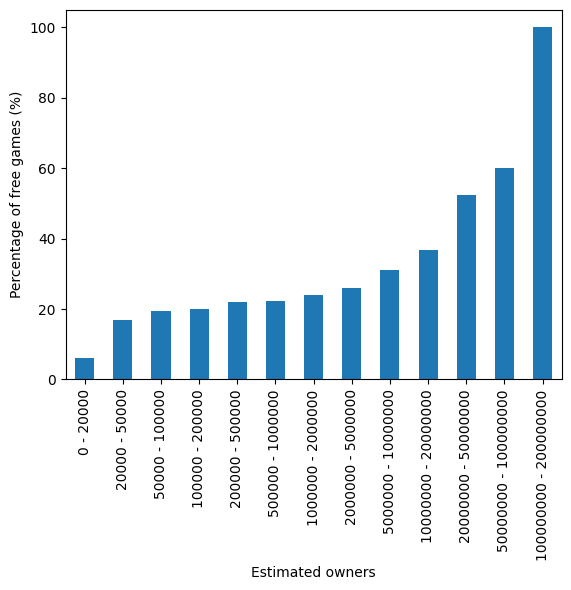

In [134]:
#Membuat grafik untuk setiap game gratis
df_percent_free.plot.bar(ylabel='Percentage of free games (%)');

In [135]:
#Dataframe yang berisi harga rata-rata USD per kategori owner
df_average_price = pd.concat([df.groupby('Estimated owners')['Price'].mean().reindex(estimated_owners_order),
                                     df_wo_free.groupby('Estimated owners')['Price'].mean().reindex(estimated_owners_order)], axis=1)
df_average_price.columns = ['Average price', 'Average price excluding free games']

#Dataframe akan mengandung nilai NaN karena kategori 100M - 200M hanya berisi satu game yang gratis
#Tidak mungkin menghitung rata-rata tanpa nilai apa pun, ganti dengan 0
df_average_price.fillna(0, inplace=True)
df_average_price

,Average price,Average price excluding free games
Estimated owners,,
0 - 20000,7.739777,8.234260
20000 - 50000,7.903591,9.497390
50000 - 100000,9.096731,11.292493
100000 - 200000,10.204351,12.768619
200000 - 500000,11.226188,14.415000
500000 - 1000000,13.801401,17.752919
1000000 - 2000000,16.116552,21.205990
2000000 - 5000000,18.625089,25.132651
5000000 - 10000000,16.294301,23.677656


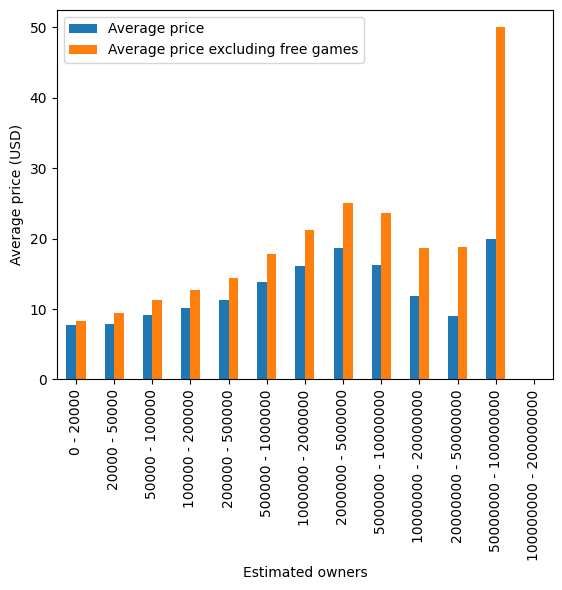

In [154]:
#Membuat grafik untuk harga rata-rata USD berdasarkan kategori owner
df_average_price.plot.bar(ylabel='Average price (USD)');

In [155]:
#Mengimpor library yang dibutuhkan
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [156]:
#Menghapus data kosong dan mengubah Estimated owners menjadi angka
# Menghapus data kosong dan mengubah Estimated owners menjadi angka
df = df.dropna(subset=['Estimated owners', 'Price', 'Genres', 'Categories'])

df['Estimated owners'] = (
    df['Estimated owners']
    .astype(str)                              # ubah semua nilai jadi string
    .str.replace(' - ', '-')                  # hapus spasi di rentang
    .str.split('-')                           # pisah dua angka
    .apply(lambda x: int(x[0]) if x[0].isdigit() else 0)  # ambil angka pertama
)

In [157]:
# Membuat encoder untuk kolom genre dan kategori
label_genre = LabelEncoder()
label_cat = LabelEncoder()

# Mengubah teks menjadi angka unik
df['Genre_encoded'] = label_genre.fit_transform(df['Genres'])
df['Category_encoded'] = label_cat.fit_transform(df['Categories'])


In [158]:
X = df[['Price', 'Discount', 'DLC count', 'Genre_encoded', 'Category_encoded']]
y = df['Estimated owners']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [160]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [161]:
y_pred = model.predict(X_test)

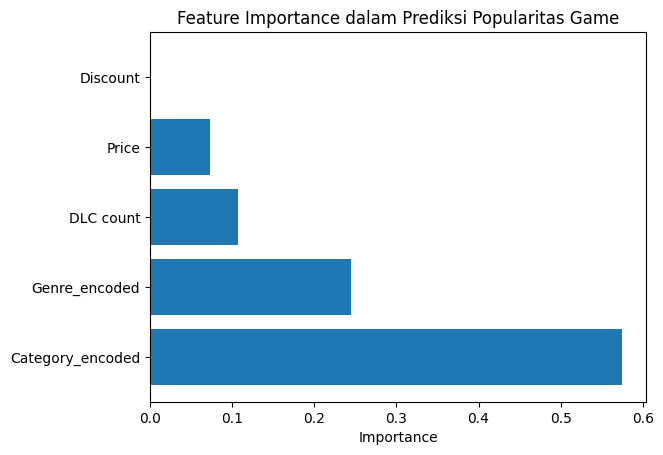

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.barh(importance['Feature'], importance['Importance'])
plt.title("Feature Importance dalam Prediksi Popularitas Game")
plt.xlabel("Importance")
plt.show()


In [177]:
summary_df = (
    df.groupby(['Genres', 'Categories'])
      .agg({'Estimated owners':'mean', 'Price':'mean'})
      .reset_index()
      .sort_values('Estimated owners', ascending=False)
      .head(15)
)

In [178]:
from google.colab import userdata

api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

output = Replicate(model="ibm-granite/granite-3.3-8b-instruct",
                   replicate_api_token=api_token)

In [182]:
summary_text = summary_df.head(10).to_string(index=False)
prompt = f"""
Here is the average popularity data of Steam games by genre and category:

{summary_text}

Please provide
The most popular genre-category combinations and game examples (distinguish between F2P and paid games).
"""
response = output.invoke(prompt)
print(response)

Based on the provided data, the most popular genre-category combinations and their estimated owners are:

1. **Action, Free to Play, Multi-player** (50,000,000 estimated owners): This category encompasses various multiplayer action games available for free on Steam. Examples include games like "PlayerUnknown's Battlegrounds (PUBG)", "Fortnite", and "Team Fortress 2".

2. **Action, Adventure, Massively Multiplayer** (50,000,000 estimated owners): Popular in both free-to-play and paid models, this category includes massive online action-adventure games. Examples are "Guild Wars 2", "The Elder Scrolls Online", and "Final Fantasy XIV".

3. **Action, Adventure, Massively Multiplayer, RPG** (50,000,000 estimated owners): This combination includes RPG-focused massively multiplayer action-adventure games. Notable examples are "World of Warcraft", "Black Desert Online", and "Final Fantasy XIV".

4. **Action, Adventure, Free to Play, Massively Multiplayer, RPG** (20,000,000 estimated owners): Th

In [184]:
summary_text = summary_df.head(10).to_string(index=False)
prompt = f"""
Here is the average popularity data of Steam games by genre and category:

{summary_text}

Please provide
The ideal price range for popular games.
"""
response = output.invoke(prompt)
print(response)

Based on the provided data, the most popular games fall within a few specific categories, with estimated owners ranging from 20 million to 100 million. Here's a summary of the price points for those popular games:

1. Action, Free to Play, with various multiplayer features, achievements, trading cards, and workshop support: $0.00
2. Action, Adventure, Massively Multiplayer, RPG: $39.99
3. Action, Adventure, Free to Play, Massively Multiplayer, RPG: $0.00
4. Action, Free to Play, Massively Multiplayer, Simulation: $0.00
5. Action, Adventure, Free to Play, Massively Multiplayer, RPG: $0.00
6. Action, RPG: $59.99

From this data, we can observe the following price ranges for popular games:

- Free-to-play (F2P) games with extensive features like multiplayer, trading cards, workshop support, and achievements seem to have the highest estimated owner counts (20 million to 100 million), with no price attached.
- Premium action RPG titles, such as those with single-player and multiplayer optio

In [193]:
summary_text = summary_df.head(10).to_string(index=False)
prompt = f"""
Here is the average popularity data of Steam games by genre and category:

{summary_text}

Please provide
Hidden insights about outlier success of indie games
"""
response = output.invoke(prompt)
print(response)

1. Indie Games' Success: The data shows that indie games, particularly those in the Action, Adventure, and Free to Play genres with Massively Multiplayer and RPG categories, have a significant player base, with estimated owners ranging from 20 to 50 million. This indicates that indie games can achieve considerable popularity and success.

2. Pricing Strategy: Interestingly, most indie games listed have a price of $0.00 (Free to Play), suggesting that this pricing strategy is effective for attracting a large number of players. Only one indie RPG game has a price tag of $59.99, which might indicate that pricing can vary based on game complexity, features, or developer preferences.

3. Feature Adoption: Indie games often include popular features like Multi-player, PvP, Co-op, Steam Achievements, Steam Trading Cards, and In-App Purchases. These features seem to contribute to their popularity, as they are present in many successful indie games across different genres.

4. Limited Controller